# Preparing Data for Classification Models

## Preparing data

In [1]:
import pandas as pd

# Let's load the cleaned train dataset
train_data = pd.read_csv("datasets/train_cleaned.csv", index_col=0)
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
710,3,male,young,1,1,low,C,1
440,2,male,middle,0,0,low,S,0
841,3,male,young,0,0,low,S,0
721,2,female,young,0,1,low,S,1
40,3,female,young,1,0,low,C,1
...,...,...,...,...,...,...,...,...
506,1,male,young,1,0,low,C,0
640,3,male,young,1,0,low,S,0
879,3,male,young,0,0,low,S,0


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 710 to 804
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    712 non-null    int64 
 1   Sex       712 non-null    object
 2   Age       712 non-null    object
 3   SibSp     712 non-null    int64 
 4   Parch     712 non-null    int64 
 5   Fare      712 non-null    object
 6   Embarked  712 non-null    object
 7   Survived  712 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 50.1+ KB


In [3]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [4]:
# Use One-Hot enconding
one_hot_train_data = pd.get_dummies(data=X_train, dtype='int8')

In [5]:
one_hot_train_data

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age_middle,Age_old,Age_young,Fare_high,Fare_low,Fare_mid,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
710,3,1,1,0,1,0,0,1,0,1,0,1,0,0
440,2,0,0,0,1,1,0,0,0,1,0,0,0,1
841,3,0,0,0,1,0,0,1,0,1,0,0,0,1
721,2,0,1,1,0,0,0,1,0,1,0,0,0,1
40,3,1,0,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1,1,0,0,1,0,0,1,0,1,0,1,0,0
640,3,1,0,0,1,0,0,1,0,1,0,0,0,1
879,3,0,0,0,1,0,0,1,0,1,0,0,0,1


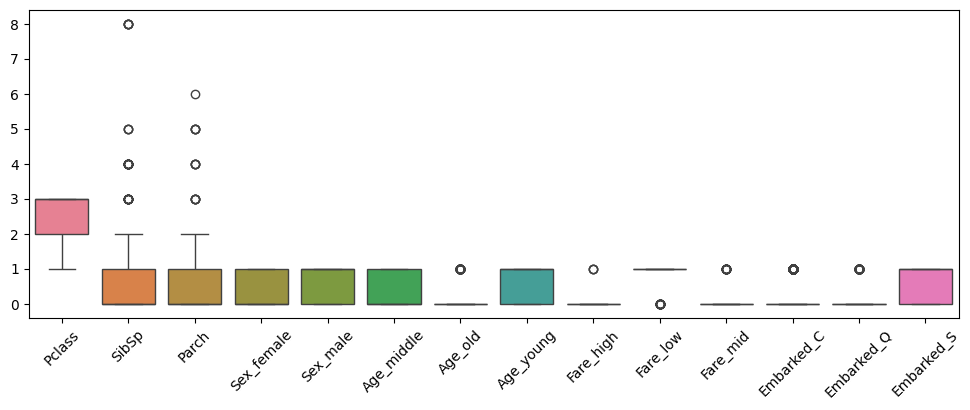

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.boxplot(data=one_hot_train_data)
plt.xticks(rotation=45)
plt.show()

In [7]:
X_train = one_hot_train_data

#### Test data

In [8]:
# Let's load the test data
test_data = pd.read_csv("datasets/test.csv", index_col=0)
test_data = test_data.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1)

categorized_ages = pd.cut(x=test_data['Age'], bins=[0, 30, 50, 90], labels=['young', 'middle', 'old'])
categorized_fares = pd.cut(x=test_data['Fare'], bins=[-0.5, 150, 300, 600], labels=['low', 'mid', 'high'])

test_data['Fare'] = categorized_fares
test_data['Age'] = categorized_ages

test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
620,2,male,young,0,0,low,S,0
762,3,male,middle,0,0,low,S,0
646,1,male,middle,1,0,low,C,1
755,2,female,middle,1,2,low,S,1
557,1,female,middle,1,0,low,C,1
...,...,...,...,...,...,...,...,...
107,3,female,young,0,0,low,S,1
271,1,male,NaN,0,0,low,S,0
861,3,male,middle,2,0,low,S,0


In [9]:
y_test = test_data['Survived']
test_data.drop('Survived', axis=1, inplace=True)
X_test = test_data

In [10]:
X_test = pd.get_dummies(data=X_test, dtype='int8')
X_test.columns = X_train.columns

## Model Development

#### Logistic Regression

In [11]:
# Let's try Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log_reg = LogisticRegression(random_state=42)
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'max_iter': [100, 300, 500, 1000]
}

grid_search_cv = GridSearchCV(estimator=log_reg, param_grid=parameters, cv=10)

In [12]:
best_log_estimator = grid_search_cv.fit(X_train, y_train)

In [13]:
best_log_estimator.best_params_

{'C': 0.5, 'max_iter': 100}

In [14]:
# best_estimator.cv_results_

In [15]:
best_log_estimator.score(X_train, y_train)

0.7893258426966292

Text(0.5, 1.0, 'Confusion Matrix of training data')

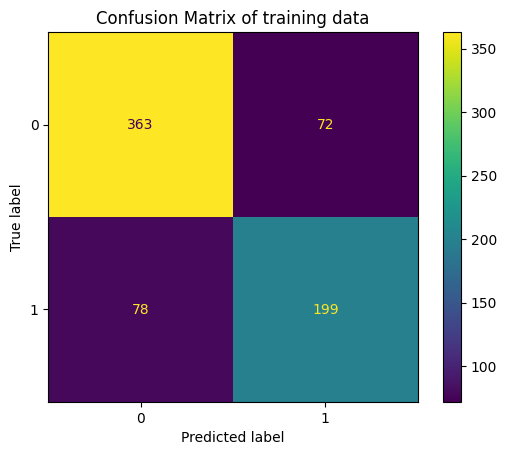

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = best_log_estimator.predict(X_train)
cm = ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
plt.title("Confusion Matrix of training data")

In [17]:
best_log_estimator.score(X_test, y_test)

0.776536312849162

- Train accuracy = 79%

- Test accuracy = 78%

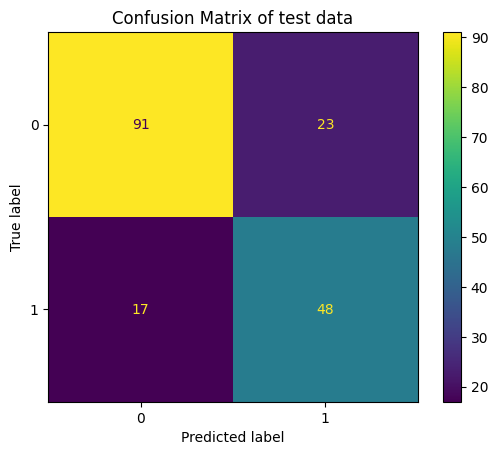

In [18]:
y_test_pred = best_log_estimator.predict(X_test)
cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_test_pred)
plt.title("Confusion Matrix of test data")
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       114
           1       0.68      0.74      0.71        65

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.78      0.78       179



In [20]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred)

0.7384615384615385

In [21]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred)

0.676056338028169

So, this model has high recall and lower precision

#### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4],
    'max_features': [14, 'sqrt', 'log2']
}

grid_search_cv = GridSearchCV(estimator=tree_clf, param_grid=parameters, cv=10)

In [23]:
best_tree_estimator = grid_search_cv.fit(X_train, y_train)

In [24]:
best_tree_estimator.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 14}

In [25]:
best_tree_estimator.score(X_train, y_train)

0.8188202247191011

In [26]:
best_tree_estimator.score(X_test, y_test)

0.7877094972067039

- Train accuracy: 82%

- Test accuracy: 79%

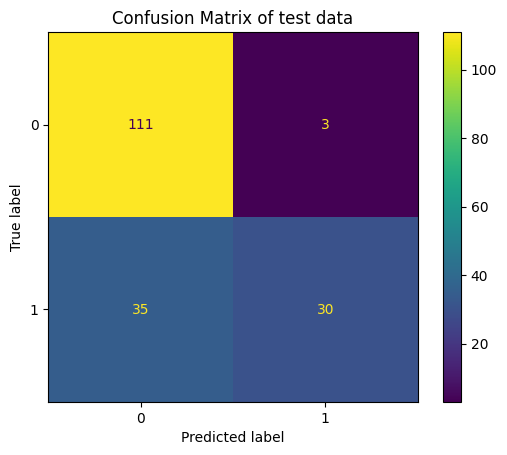

In [27]:
y_test_pred = best_tree_estimator.predict(X_test)

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Confusion Matrix of test data")
plt.show()

In [28]:
recall_score(y_test, y_test_pred)

0.46153846153846156

In [29]:
precision_score(y_test, y_test_pred)

0.9090909090909091

This model has high precision and low recall score

#### Support Vector Classifier

In [30]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'kernel': ['rbf', 'poly'],
    'coef0': [0, 0.25, 0.5, 1],
    'max_iter': [50, 100, 200]
}

grid_search_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10)

In [31]:
import warnings

with warnings.catch_warnings(action='ignore'):
    best_svc_estimator = grid_search_cv.fit(X_train, y_train)

In [32]:
best_svc_estimator.best_params_

{'C': 0.75, 'coef0': 0, 'kernel': 'rbf', 'max_iter': 200}

In [33]:
best_svc_estimator.score(X_train, y_train)

0.8117977528089888

In [34]:
best_svc_estimator.score(X_test, y_test)

0.8156424581005587

- Train accuracy: 81%

- Test accuracy: 81.5%

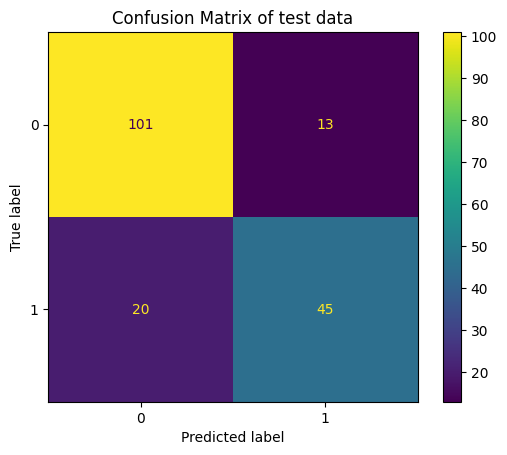

In [35]:
y_test_pred = best_svc_estimator.predict(X_test)

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Confusion Matrix of test data")
plt.show()

In [36]:
recall_score(y_test, y_test_pred)

0.6923076923076923

In [37]:
precision_score(y_test, y_test_pred)

0.7758620689655172

## Model Rankings

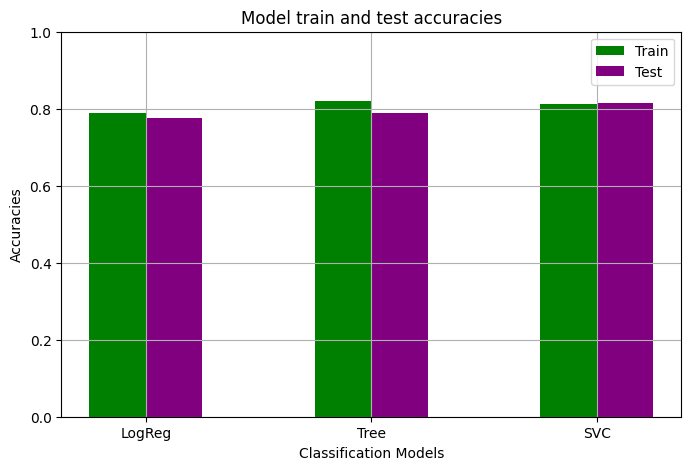

In [38]:
train_accuracies = [
    best_log_estimator.score(X_train, y_train),
    best_tree_estimator.score(X_train, y_train),
    best_svc_estimator.score(X_train, y_train)
]

test_accuracies = [
    best_log_estimator.score(X_test, y_test),
    best_tree_estimator.score(X_test, y_test),
    best_svc_estimator.score(X_test, y_test)
]

plt.figure(figsize=(8, 5))

plt.bar(x=['LogReg', 'Tree', 'SVC'], height=train_accuracies, width=-0.25, align='edge', label="Train", color='green')
plt.bar(x=['LogReg', 'Tree', 'SVC'], height=test_accuracies, width=0.25, align='edge', label="Test", color='purple')

plt.title("Model train and test accuracies")
plt.xlabel("Classification Models")
plt.ylabel("Accuracies")

plt.legend()
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True)
plt.show()

Clearly, SVC has the best balance between bias and variance.

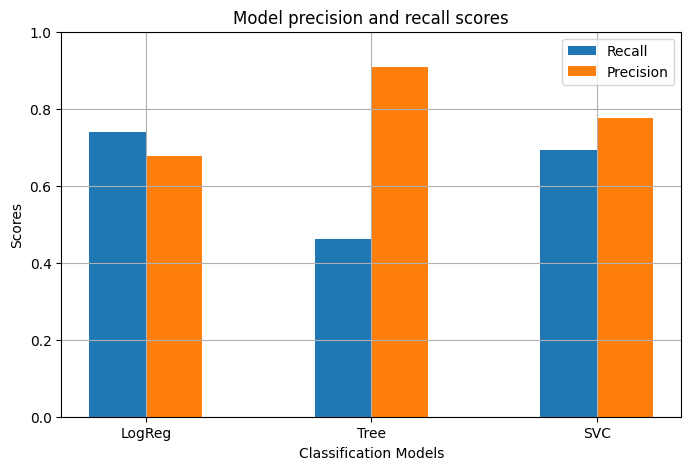

In [39]:
y_log_pred = best_log_estimator.predict(X_test)
y_tree_pred = best_tree_estimator.predict(X_test)
y_svc_pred = best_svc_estimator.predict(X_test)


recall_scores = [
    recall_score(y_test, y_log_pred),
    recall_score(y_test, y_tree_pred),
    recall_score(y_test, y_svc_pred)
]

precision_scores = [
    precision_score(y_test, y_log_pred),
    precision_score(y_test, y_tree_pred),
    precision_score(y_test, y_svc_pred)
]

plt.figure(figsize=(8, 5))

plt.bar(x=['LogReg', 'Tree', 'SVC'], height=recall_scores, width=-0.25, align='edge', label="Recall")
plt.bar(x=['LogReg', 'Tree', 'SVC'], height=precision_scores, width=0.25, align='edge', label="Precision")

plt.title("Model precision and recall scores")
plt.xlabel("Classification Models")
plt.ylabel("Scores")

plt.legend()
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True)
plt.show()

Here,

- Logreg: Good recall, lower precision

- Tree: Very high precision, lower recall

- SVC: Lower precision, high recall


Since, our goal is to predict the survival of the person in Titanic incident. We can think the trade-offs in precision and recall as follows:

- If **precision** is set to **high**: People who may *survive* may also get *missed out*.

- If **recall** is set to **high**: People who are *dead* may also *classified as alive*.

According to my logic, I think it is better to focus more on recall, as people who are **misclassified** as `alive` can be checked again for their survival.

This makes SVC the best one among the models.

In [ ]:
# Save the model
# import joblib

# joblib.dump(best_svc_estimator.best_estimator_, filename="best_svc.bz2")

['best_svc.bz2']